In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

<h1> Load and Combine Data

In [4]:
df=pd.read_csv('train.csv')
b_meta=pd.read_csv('building_metadata.csv')
weather_train=pd.read_csv('weather_train.csv')

In [5]:
df=df.merge(b_meta, how='left',on=['building_id']).merge(weather_train,how='left',on=['site_id','timestamp'])

In [7]:
df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


<h1> Cleaning

In [20]:
df.isnull().any(axis=1).sum()
(df.shape[0]-df.isnull().any(axis=1).sum())/df.shape[0]
#Only 2 percent of rows don't have at least one nan value

1.0

In [18]:
#For now just work with rows without NA and decide how to fill later on, note that 99% of data is removed
df=df.dropna(axis=0)
df.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,321728.000000,321728.0,321728.000000,321728.0,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000
mean,610.088559,0.0,179.570860,4.0,95639.173774,1953.484129,5.399120,15.724291,1.850694,9.504836,-0.000603,1017.122623,215.193020,3.881576
std,26.286334,0.0,286.361571,0.0,85362.315842,31.981264,2.689169,4.841540,1.354687,4.047034,0.162522,4.586045,116.222353,2.600554
min,565.000000,0.0,0.000000,4.0,387.000000,1903.000000,1.000000,1.100000,0.000000,-9.400000,-1.000000,1007.800000,0.000000,0.000000
25%,587.000000,0.0,17.829325,4.0,29063.000000,1924.000000,4.000000,12.800000,0.000000,7.800000,0.000000,1013.600000,120.000000,2.100000
50%,610.000000,0.0,68.983700,4.0,68701.000000,1954.000000,5.000000,15.600000,2.000000,10.600000,0.000000,1016.600000,270.000000,3.600000
75%,633.000000,0.0,195.000000,4.0,137806.000000,1970.000000,7.000000,18.900000,2.000000,12.200000,0.000000,1019.900000,300.000000,5.700000
max,655.000000,0.0,2293.880000,4.0,420885.000000,2016.000000,14.000000,35.000000,9.000000,17.800000,8.000000,1031.700000,360.000000,12.900000


In [54]:
df['primary_use']=df['primary_use'].astype('category')

<h1> Investigating Building Metadata

In [33]:
X=df.loc[:,'year_built']
Y=df.loc[:,'meter_reading']

lm=LinearRegression()
Y_fit=lm.fit(X.values.reshape(-1,1),Y).predict(X.values.reshape(-1,1))

In [34]:
year_group=df.groupby('year_built')
year_group_means=year_group.mean() #could limit size of dataframe here
year_group_std=year_group.std()
X_grouped=year_group_means.index
Y_grouped=year_group_means['meter_reading']
yerr_grouped=year_group_std['meter_reading']

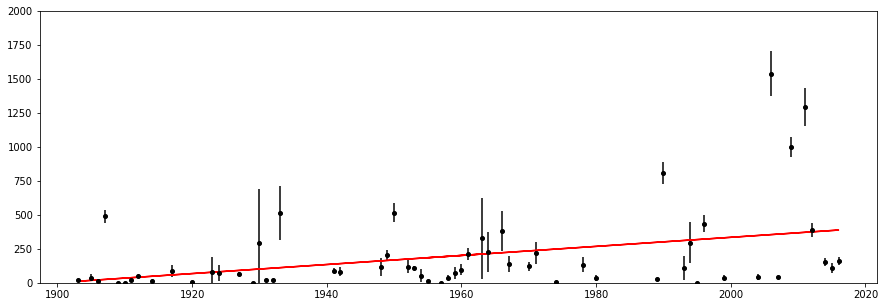

R^2 =0.14


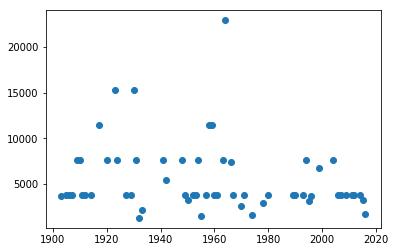

In [37]:
plt.figure(figsize=(15,5)) 
plt.errorbar(X_grouped,Y_grouped,yerr=yerr,fmt='ko',markersize=4)
plt.plot(X,Y_fit,'r')
plt.ylim(0,2000)
plt.show()
print(f'R^2 ={round(lm.score(X.values.reshape(-1,1),Y),2)}')

plt.scatter(X_grouped,year_group.count()['meter_reading'])
plt.show()

<h1>Investigate Timing Parameters

In [18]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['month']=df['timestamp'].dt.month
df['hour']=df['timestamp'].dt.hour

In [52]:
month_groups=df.groupby('month').mean()
hour_groups=df.groupby('hour').mean()

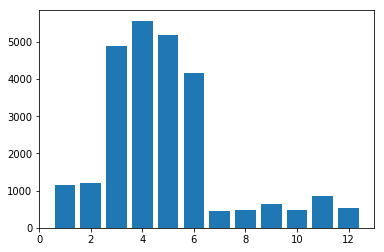

In [61]:
plt.bar(month_groups.index.values,month_groups['meter_reading'])
plt.show()

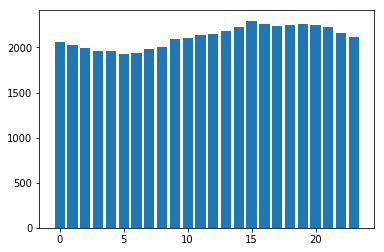

In [65]:
plt.bar(hour_groups.index.values,hour_groups['meter_reading'])
plt.show()

In [9]:
times_temp=df[df['building_id']==0].loc[::50,'timestamp'].values
e_temp=df[df['building_id']==0].loc[::50,'meter_reading'].values
air_temp=df[df['building_id']==0].loc[::50,'air_temperature'].values

#Can be multiple meters in a single building (up to 3)
#How much does power consumption vary at a single site?
#need to handle many NAN and zeros


<h1>Fitting Data

In [60]:
#linear regression

In [63]:
#Generate dummy variables and add to main dataframe
use_dummies=pd.get_dummies(df['primary_use'],drop_first=True)
df=pd.concat([df,use_dummies],axis=1)

In [71]:
df.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'Entertainment/public assembly', 'Lodging/residential',
       'Parking', 'Public services', 'Technology/science', 'Utility'],
      dtype='object')

In [110]:
#define target and features
Y=np.array(df['meter_reading'])
X=np.array(df.loc[:,['square_feet','year_built','floor_count','air_temperature',
                     'Entertainment/public assembly', 'Lodging/residential','Parking',
                     'Public services', 'Technology/science', 'Utility']])

In [117]:
#try limiting features
X=np.array(df.loc[:,['square_feet','air_temperature']])

In [118]:
#split into test-train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=1)

In [119]:
#fit data and make predictions for test set
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
#predict test and train values and compare accuracy and Kaggle chosen score
y_train_pred=lm.predict(X_train)
y_test_pred=lm.predict(X_test)

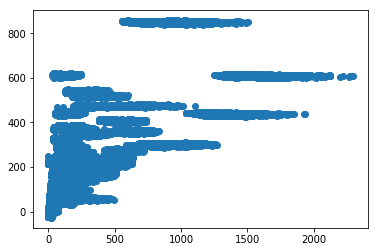

In [121]:
plt.scatter(y_train,y_train_pred)
plt.show()

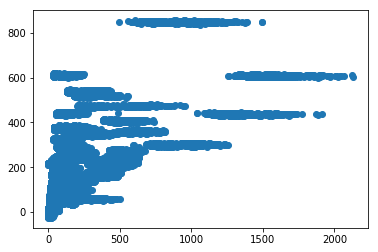

In [122]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [123]:
print(f'Training MSE: {round(mean_squared_error(y_train,y_train_pred))}')
print(f'Testing MSE: {round(mean_squared_error(y_test,y_test_pred))}')

Training MSE: 51153.0
Testing MSE: 51283.0


In [ ]:
# figure out NAN
# Add more features
# Feature engineering
# Add more features
# Different models
# Regularization
    #Ridge and lasso and (elastic net)
#Energy types in different buildings
#Data analysis